In [1]:
#Load all used libraries
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import adjusted_rand_score


In [2]:
#load iris dataset
irisDF = pd.read_csv("Iris.csv")
#enc = LabelEncoder()
#irisDF["Species"] = enc.fit_transform(irisDF["Species"])
irisDF = irisDF.drop(columns = ["Id"])
irisDF.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


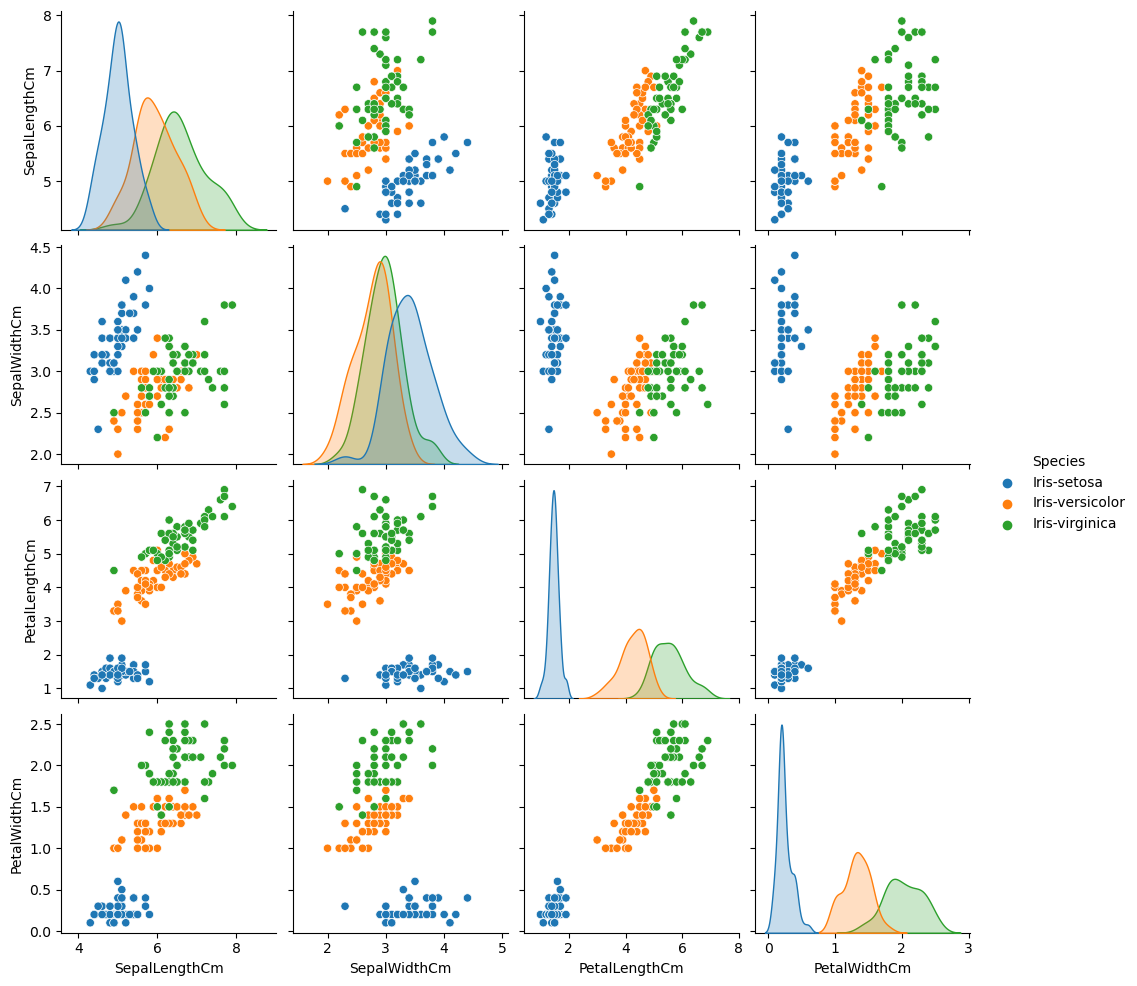

In [3]:
sns.color_palette("pastel")
sns.pairplot(irisDF,hue='Species')
plt.show()

In [4]:
TRAIN_LABEL_COL = "Species"
TRAIN_FEATURES = [col for col in irisDF.columns if col != TRAIN_LABEL_COL]
X = irisDF[TRAIN_FEATURES]
y = irisDF[TRAIN_LABEL_COL]

In [5]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [6]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
y_pred = dbscan.fit_predict(X)

In [7]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [8]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [9]:
len(dbscan.core_sample_indices_)

117

In [10]:
dbscan.core_sample_indices_[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
dbscan.components_[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  pred_label
0              5.1           3.5            1.4           0.2           0
1              4.9           3.0            1.4           0.2           0
2              4.7           3.2            1.3           0.2           0
3              4.6           3.1            1.5           0.2           0
4              5.0           3.6            1.4           0.2           0
..             ...           ...            ...           ...         ...
145            6.7           3.0            5.2           2.3           1
146            6.3           2.5            5.0           1.9           1
147            6.5           3.0            5.2           2.0           1
148            6.2           3.4            5.4           2.3           1
149            5.9           3.0            5.1           1.8           1

[150 rows x 5 columns]


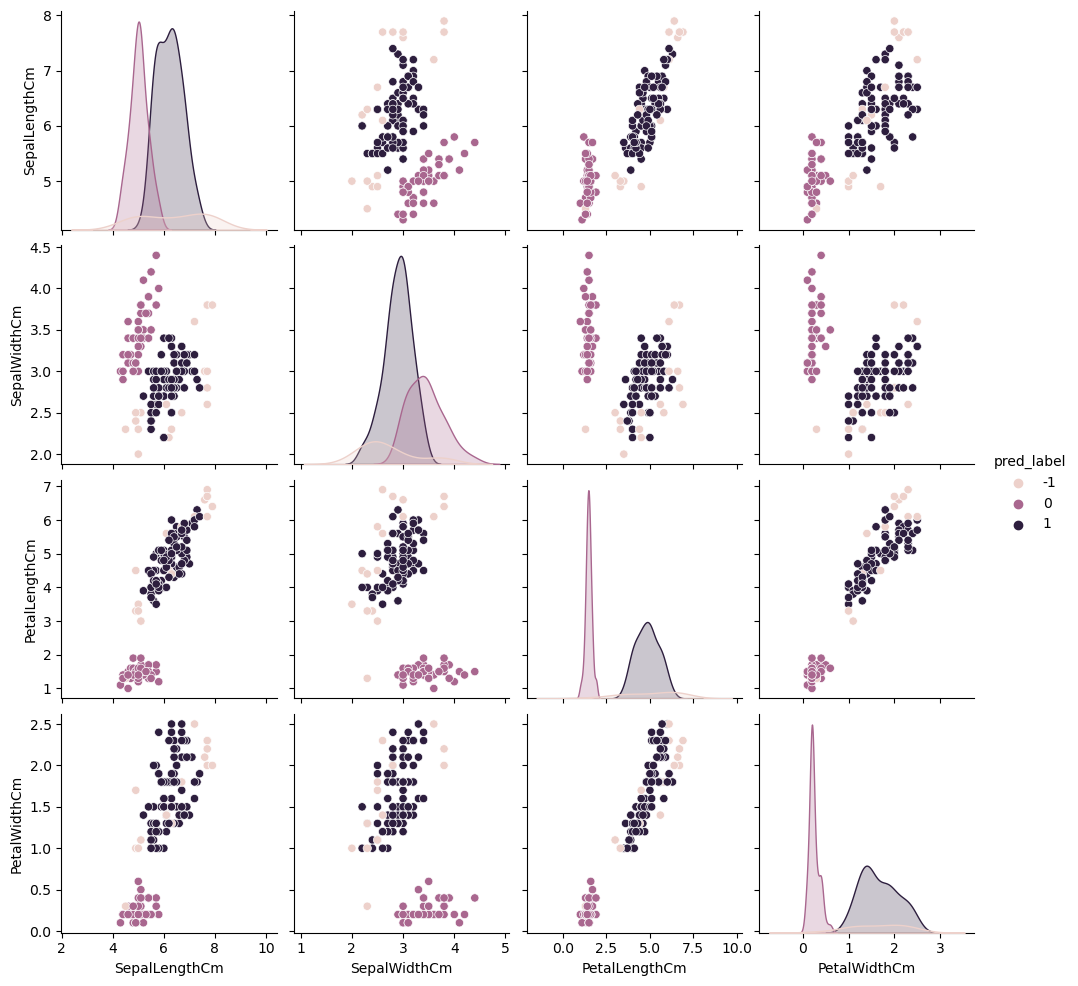

In [13]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()

In [14]:
adjusted_rand_score(y, y_pred)

0.5206185241703302